In [2]:
#! pip install xgboost

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')



In [3]:
# Since Kaggle already has a Training set and a Test set, there is no need to split the data into training set and test set.
# If there was only one data set, we would have used 80/20 split of the data with random seed fixed.
# from sklearn.model_selection import train_test_split
#   train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train = pd.read_csv('all-st-train.csv', error_bad_lines=False, warn_bad_lines=False)
#test = pd.read_csv('all-st-test.csv')
#sample_submission = pd.read_csv('/kaggle/input/allstate-claims-severity/sample_submission.csv')


In [4]:
train.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1.0    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2.0    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5.0    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10.0    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11.0    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188319 entries, 0 to 188318
Columns: 132 entries, id to loss
dtypes: float64(16), object(116)
memory usage: 189.7+ MB


This desribe() shows a summary of the numerical attributes in the claims training set 

In [6]:

train.describe()

id          cont1          cont2          cont3  \
count  188319.000000  188318.000000  188318.000000  188318.000000   
mean   294134.420660       0.493861       0.507188       0.498918   
std    169336.991768       0.187640       0.207202       0.202105   
min         0.348388       0.000016       0.001149       0.002634   
25%    147747.000000       0.346090       0.358319       0.336963   
50%    294537.000000       0.475784       0.555782       0.527991   
75%    440679.000000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [7]:
# This shows any rows with Nan values, then isnull() shows rows with 
train.isnull().values.any()
train.isnull()
#train[train.isnull().any(axis=1)]


id   cat1   cat2   cat3   cat4   cat5   cat6   cat7   cat8   cat9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
188314  False  False  False  False  False  False  False  False  False  False   
188315  False  False  False  False  False  False  False  False  False  False   
188316  False  False  False  False  False  False  False  False  False  False   
188317  False  False  False  False  False  False  False  False  False  False   
188318  False  False  False  False  False  False  False  False  False  False   

        ...  cont6  cont7  cont8  cont9  cont10  cont11  cont12  cont13  \
0       ...  False  False  False  False   False   False   False   False   
1       ...  False  False  False  False   False   False   False   False   
2       ...  False  False  False  False   False   False   False   False   
3       ...  False  False  False  False   False   False   False   False   
4       ...  False  False  False  False   False   False   False   False   
...     ...    ...    ...    ...    ...     ...     ...     ...     ...   
188314  ...  False  False  False  False   False   False   False   False   
188315  ...  False  False  False  False   False   False   False   False   
188316  ...  False  False  False  False   False   False   False   False   
188317  ...  False  False  False  False   False   False   False   False   
188318  ...   True   True   True   True    True    True    True    True   

        cont14   loss  
0        False  False  
1        False  False  
2        False  False  
3        False  False  
4        False  False  
...        ...    ...  
188314   False  False  
188315   False  False  
188316   False  False  
188317   False  False  
188318    True   True  

[188319 rows x 132 columns]

In [8]:
#train.isnull().sum()

df1 = train[train.isna().any(axis=1)]
df1

id      cat1      cat2      cat3      cat4      cat5      cat6  \
188318  0.348388   .672862   .551054   .344450   .447670   .538810   .492200   

            cat7      cat8      cat9  ... cont6 cont7 cont8 cont9 cont10  \
188318   .481306   .654753   .406237  ...   NaN   NaN   NaN   NaN    NaN   

       cont11 cont12 cont13 cont14 loss  
188318    NaN    NaN    NaN    NaN  NaN  

[1 rows x 132 columns]

Appears there is just one row out of 188k rows, with cont variables as Nan, so we can drop this row.

In [9]:

train = train.dropna()
print("Number of missing values",train.isnull().sum().sum())

Number of missing values 0


In [10]:
# Dropping id and other too much null value columns if any 
df2 = train[[column for column in train if train[column].count() / len(train) >= 0.3]]
del df2['id']
print("List of dropped columns:", end=" ")
for c in train.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

df2.info()

train = df2

train.head()

List of dropped columns: id, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 189.7+ MB


cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6     cont7  \
0    A    B    A    B    A    A    A    A    B     A  ...  0.718367  0.335060   
1    A    B    A    A    A    A    A    A    B     B  ...  0.438917  0.436585   
2    A    B    A    A    B    A    A    A    B     B  ...  0.289648  0.315545   
3    B    B    A    B    A    A    A    A    B     A  ...  0.440945  0.391128   
4    A    B    A    B    A    A    A    A    B     B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

Now let us convert Cat values to numeric values 

In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in train:
    if 'cat' in i:
        train[i] = enc.fit_transform(train[i])

In [12]:
train.head()

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...     cont6  \
0     0     1     0     1     0     0     0     0     1      0  ...  0.718367   
1     0     1     0     0     0     0     0     0     1      1  ...  0.438917   
2     0     1     0     0     1     0     0     0     1      1  ...  0.289648   
3     1     1     0     1     0     0     0     0     1      0  ...  0.440945   
4     0     1     0     1     0     0     0     0     1      1  ...  0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  2763.85  

[5 rows x 131 columns]

Let us analyse the claims(loss) data, let us see how it is distributed, min, max, std, curve plot, box plot etc

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


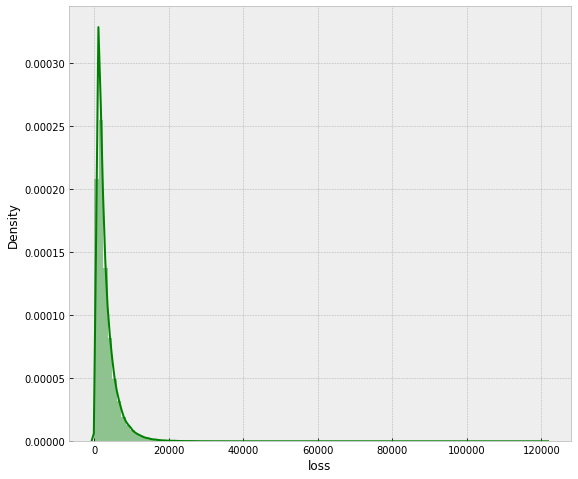

In [13]:

print(train['loss'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['loss'], color='g', bins=100, hist_kws={'alpha': 0.4});

<AxesSubplot:xlabel='loss'>

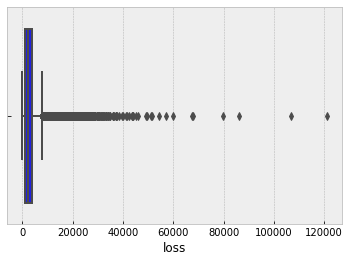

In [14]:
# train.boxplot(column=['loss'], grid=False, color='blue')
sns.boxplot(train["loss"], color='blue')


As we can see from the plots the output doesn't look like normally distributed, and has huge outliers. It is highly skewed to the right cause of the outliers.
If we want it normally distributed, let us see if Logarithmic transformation would do it

<AxesSubplot:xlabel='loss'>

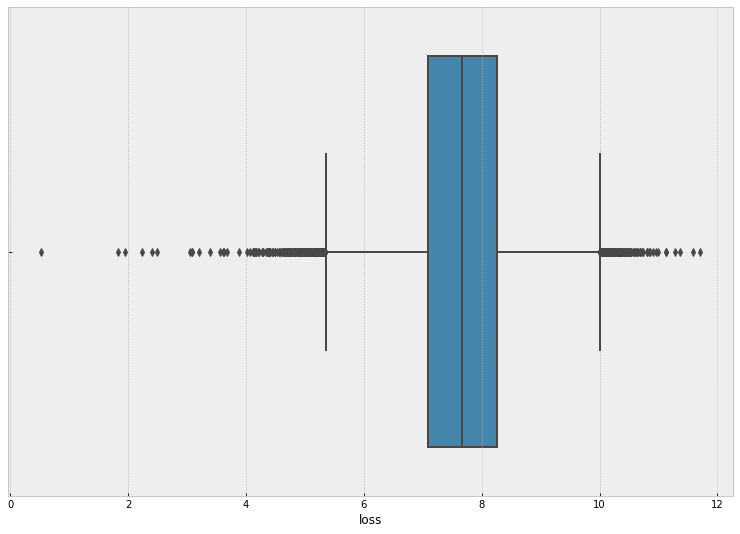

In [15]:
import numpy as np 

plt.figure(figsize=(13,9))
sns.boxplot(np.log1p(train["loss"]))

<AxesSubplot:xlabel='loss', ylabel='Density'>

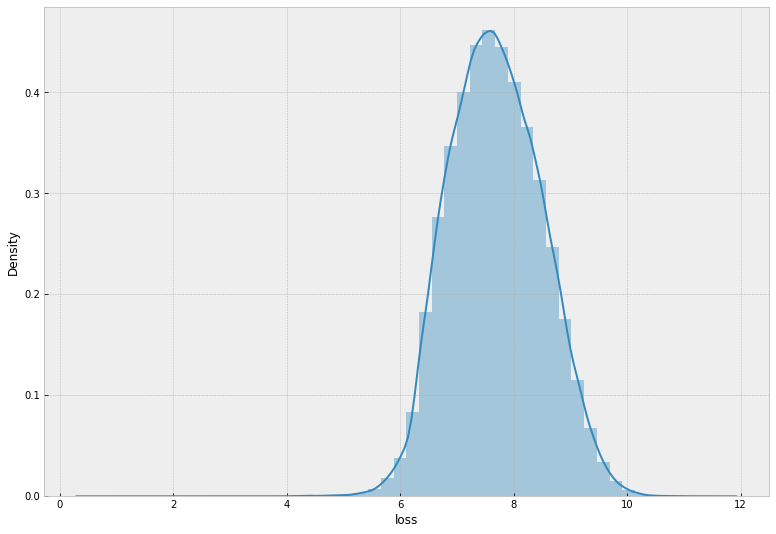

In [16]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["loss"]))

As we are getting a normally distrted curve, so we can train our model without removing outliers.

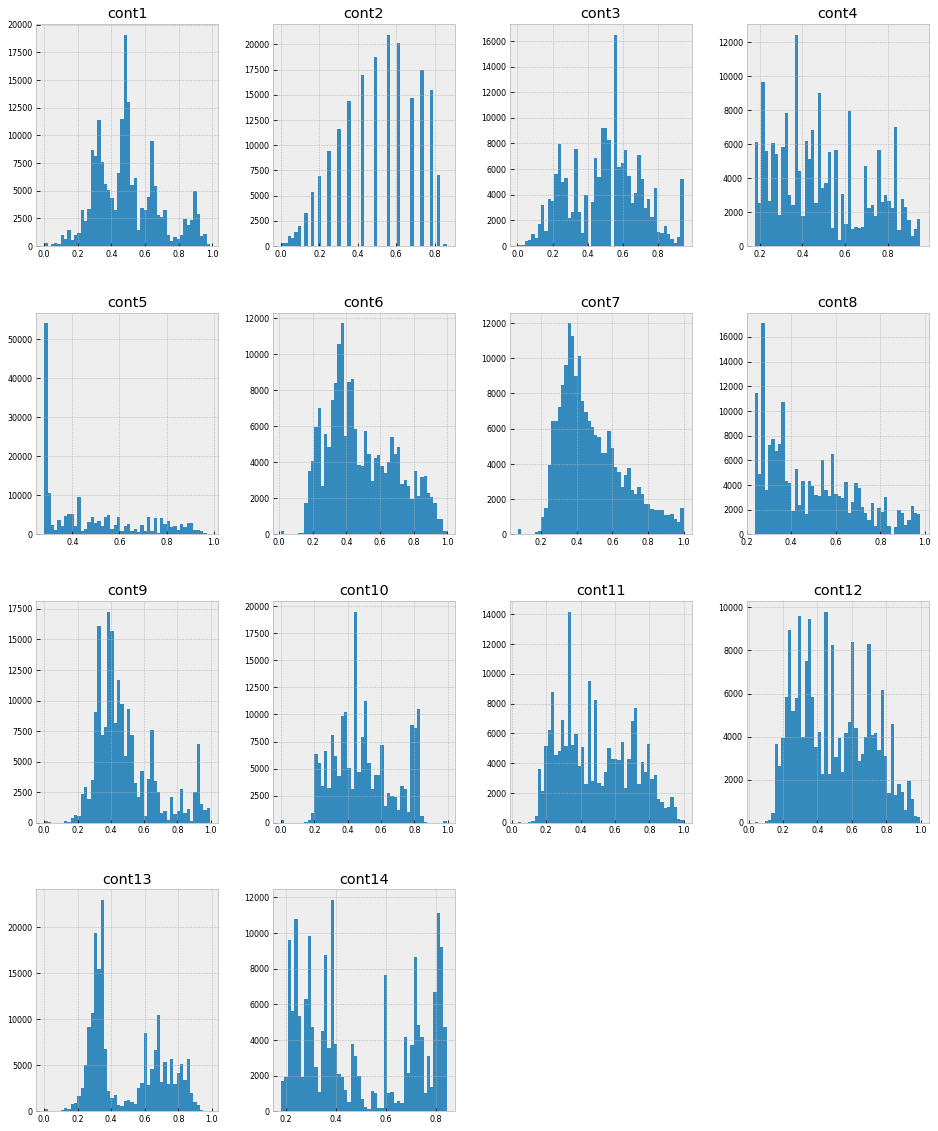

In [17]:
#  Histogram of cont variables 
cont_features = train.iloc[:,-15:-1]
cont_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 


<AxesSubplot:>

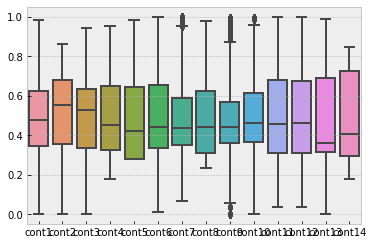

In [18]:
#sns.boxplot(cont_features, color='blue')

sns.boxplot(data=cont_features)


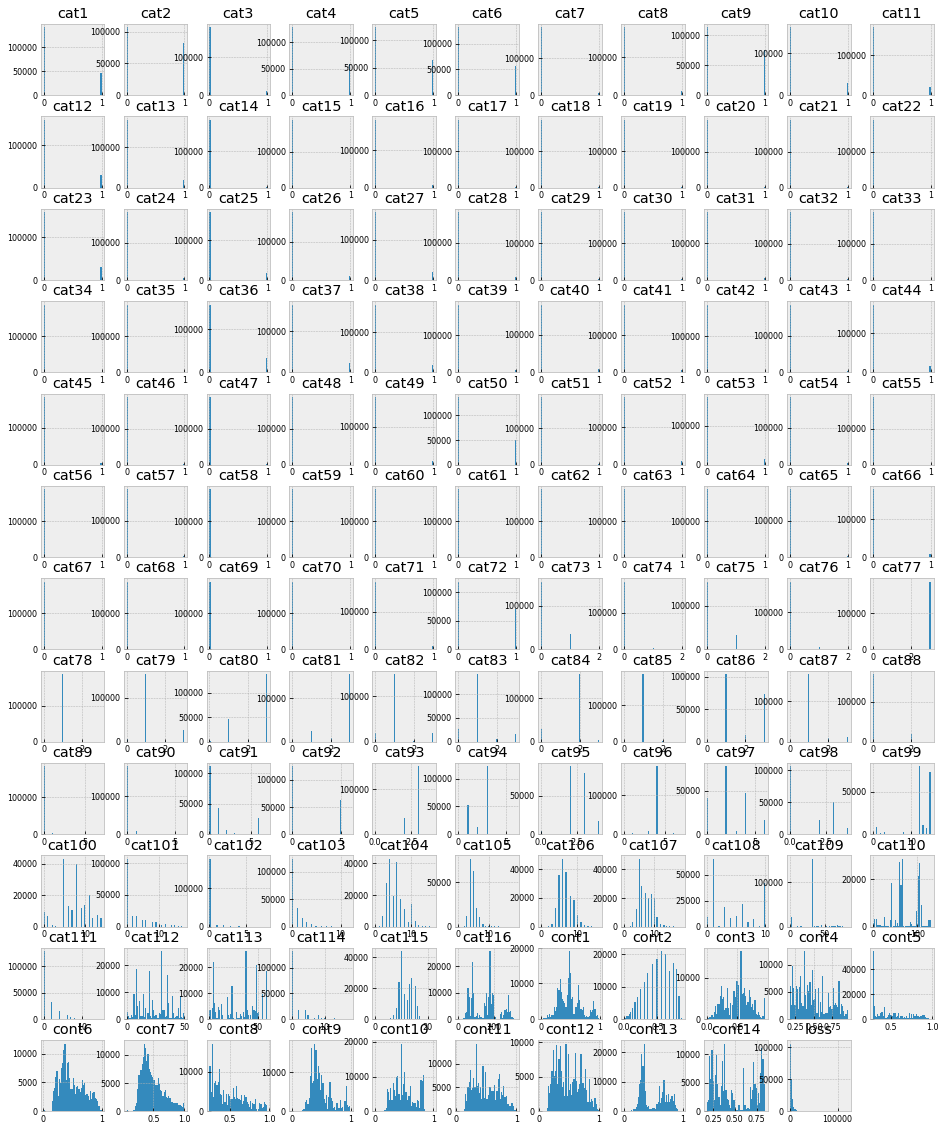

In [19]:
# Plotting all variables, for Cat variables we can see how the results are distributed acroos categories, 
# just to get an idea of the data.
# avoid having the matplotlib verbose informations
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

Let us find what attributes are important, are highly correlated with the target claims/loss.

In [20]:

#train2 = train
#train2['loss'] = train2['loss'].map(np.log1p)

# For Categorical values of more than 2 values, spearman correlation is better than pearsons(default)


df_num_corr = train.corr(method='spearman')['loss'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Loss:\n{}".format(len(golden_features_list), golden_features_list))

# np.log1p

There is 0 strongly correlated values with Loss:
Series([], Name: loss, dtype: float64)


In [22]:
## We will run with a low correlation value 0.3
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with Loss:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with Loss:
cat79     0.358305
cat12     0.338159
cat101    0.332317
cat87     0.323078
cat80    -0.472427
Name: loss, dtype: float64


Since no cont features are highly correlated with the loss value, let us see what is the correlation index of the cont varibales with loss any way. How weak is the correlation and what cont varibale has the highest value.

In [23]:

cont_features = train.iloc[:,-15:-1]
cont_features["loss"] = train["loss"]
cont_features.head()



cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85

In [24]:
df_num_corr_2 = cont_features.corr()['loss'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr_2[abs(df_num_corr_2) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


There is 5 strongly correlated values with SalePrice:
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
Name: loss, dtype: float64


## Categorical features are much higher correlated with Loss than Numerical features !!
AAmong the Numerical features, cont 2 has the hghest effect on traget value loss

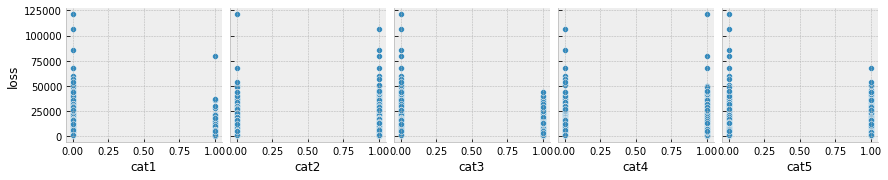

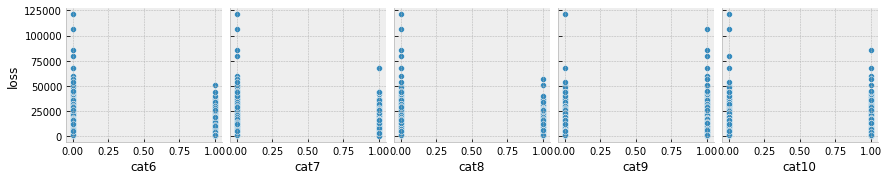

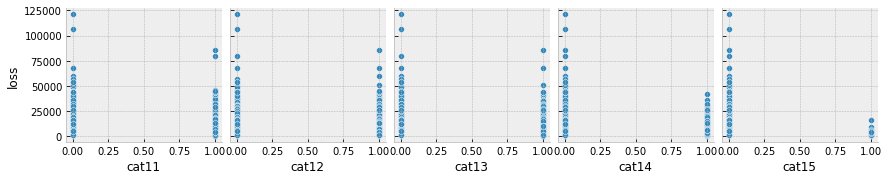

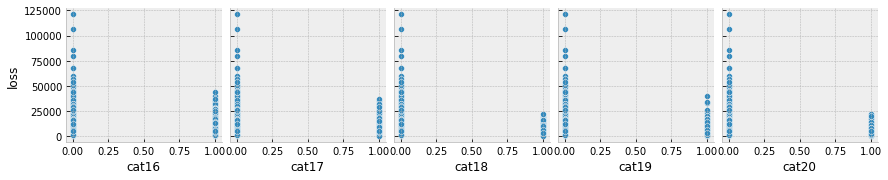

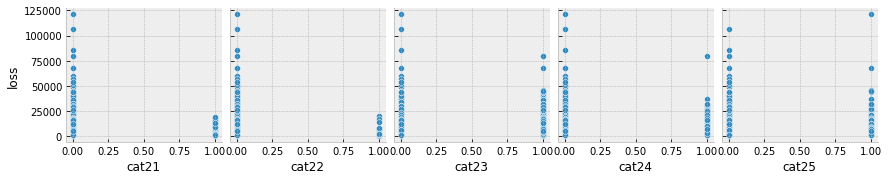

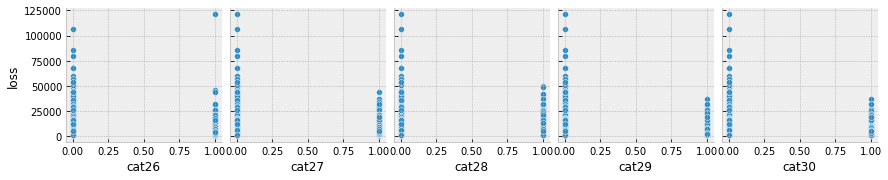

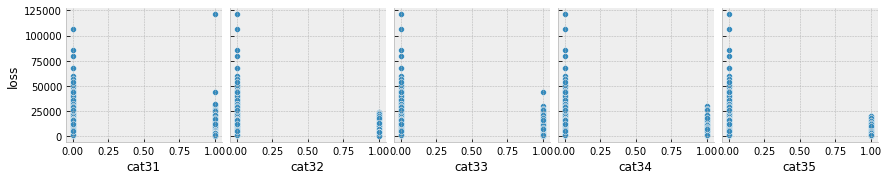

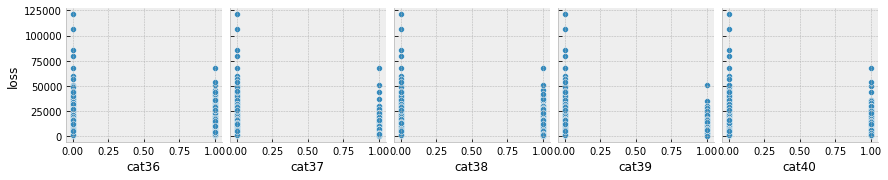

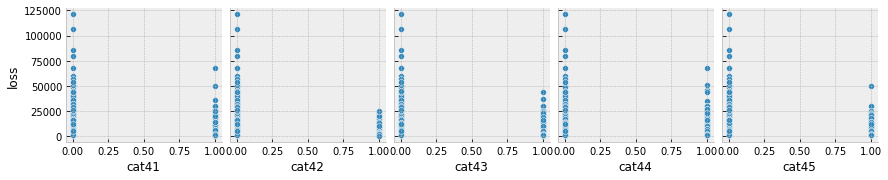

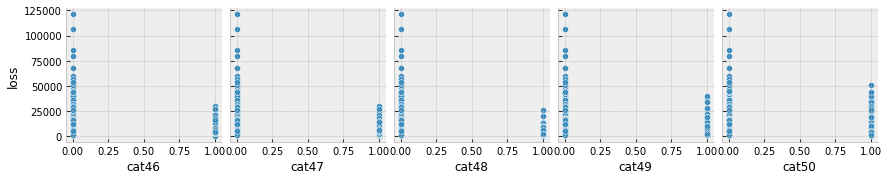

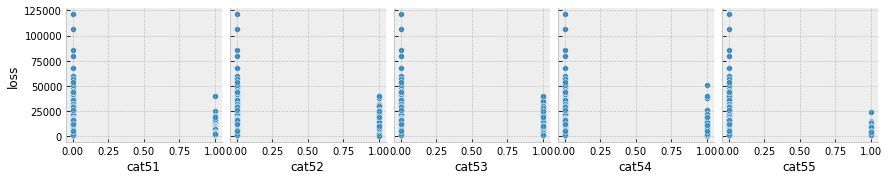

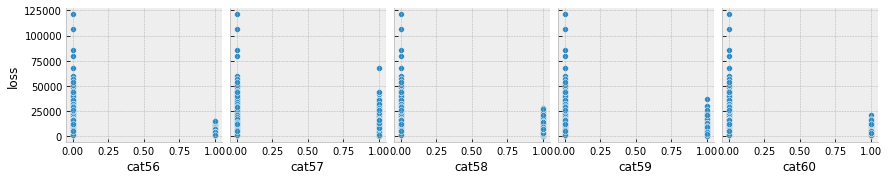

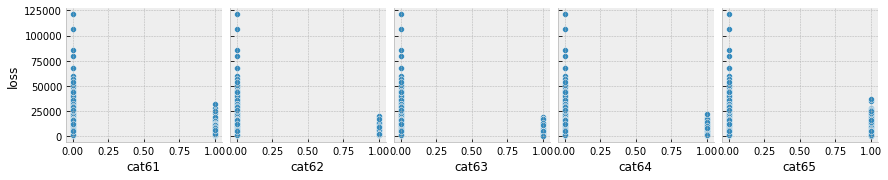

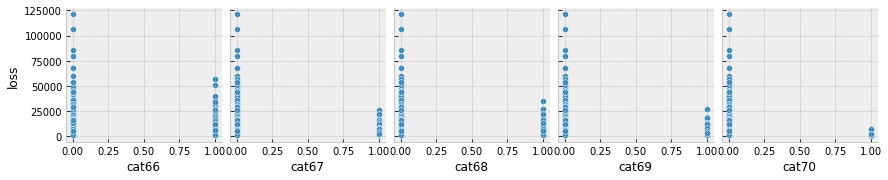

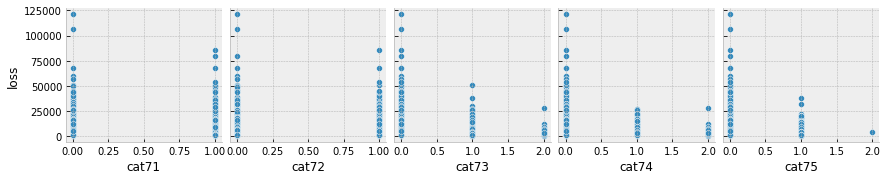

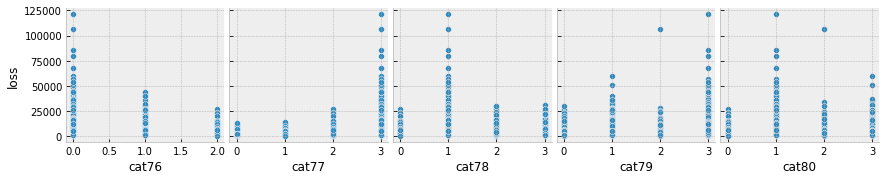

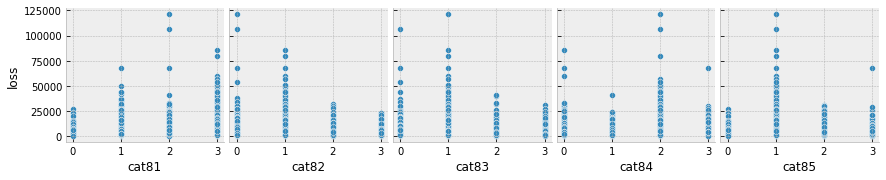

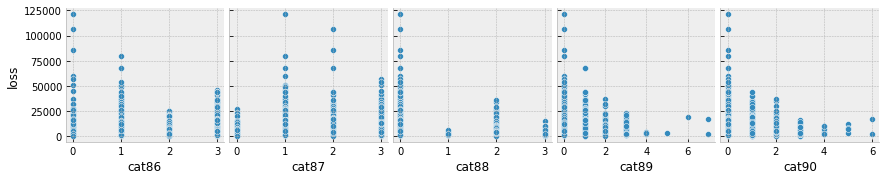

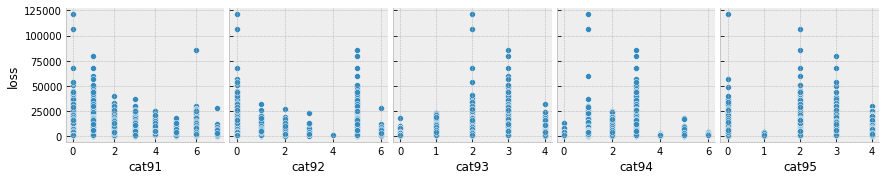

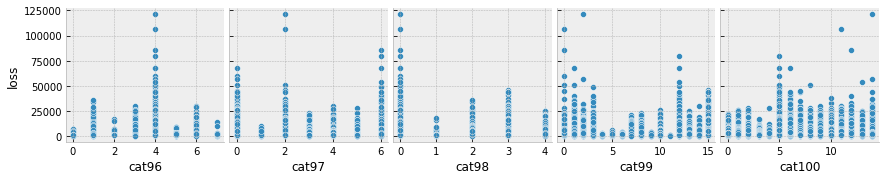

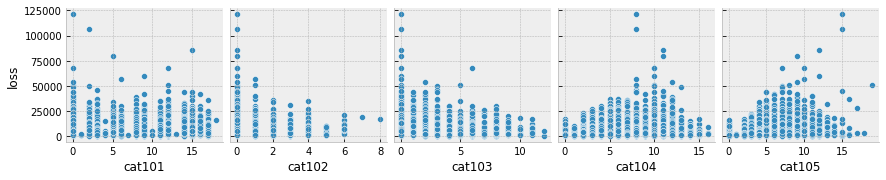

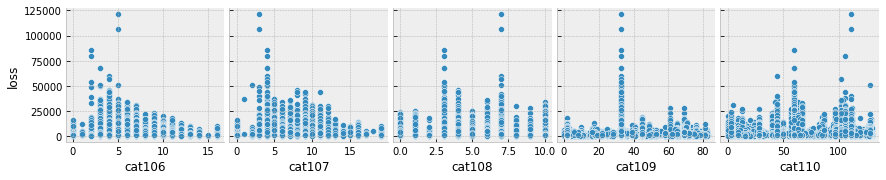

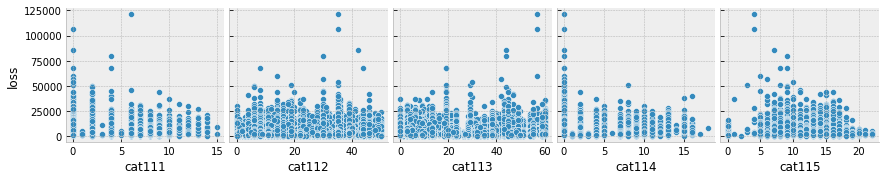

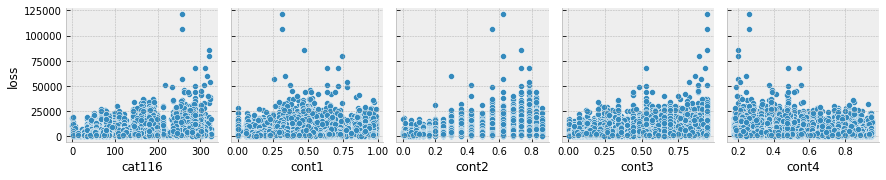

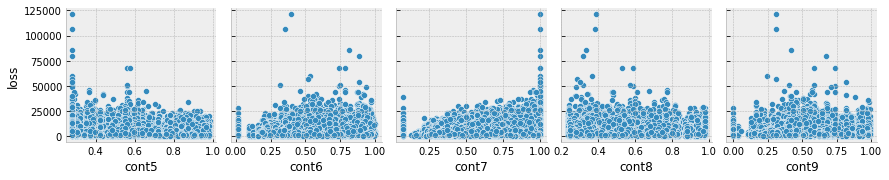

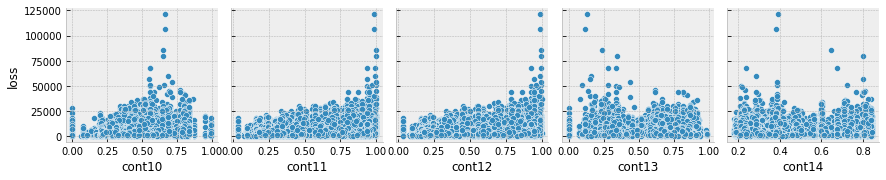

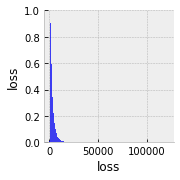

In [25]:
# Pair Plot 
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['loss'])

Checking the difference between Pearson (default) and Spearman correlations.
The correlation indexes are a bit different, but the overall correlation ranking is the same.

In [26]:

corr_matrix = train.corr(method='spearman')
corr_matrix["loss"].sort_values(ascending=False)

loss      1.000000
cat79     0.358305
cat12     0.338159
cat101    0.332317
cat87     0.323078
            ...   
cat6     -0.173290
cat73    -0.183353
cat1     -0.271069
cat81    -0.282146
cat80    -0.472427
Name: loss, Length: 131, dtype: float64

In [27]:
# (method='pearson')  # default
corr_matrix = train.corr()
corr_matrix["loss"].sort_values(ascending=False)

loss      1.000000
cat79     0.441172
cat101    0.352646
cat87     0.346311
cat57     0.316736
            ...   
cat6     -0.116883
cat73    -0.154457
cat1     -0.222105
cat81    -0.259191
cat80    -0.473257
Name: loss, Length: 131, dtype: float64

Here we are trying to spot correlations between features, perhaps we can consider combining some feature, reducing the feature set later.

In [28]:
# Correlation between continuous variables
corr_mat = train.iloc[:,117:132].corr()

# Spot the continuous feature pairs with high correlation
threshold = 0.75
high_corrs = (corr_mat[abs(corr_mat) > threshold][corr_mat != 1.0]) .unstack().dropna().to_dict()
unique_high_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), high_corrs[key]) for key in high_corrs])), columns=['cont_feature_pair', 'correlation_coefficient'])
unique_high_corrs = unique_high_corrs.loc[abs(unique_high_corrs['correlation_coefficient']).argsort()[::-1]]
unique_high_corrs


cont_feature_pair  correlation_coefficient
6  (cont11, cont12)                 0.994384
2   (cont10, cont6)                 0.883351
0   (cont13, cont6)                 0.815091
5    (cont6, cont9)                 0.797544
3   (cont10, cont9)                 0.785697
1   (cont12, cont6)                 0.785144
4   (cont11, cont6)                 0.773745

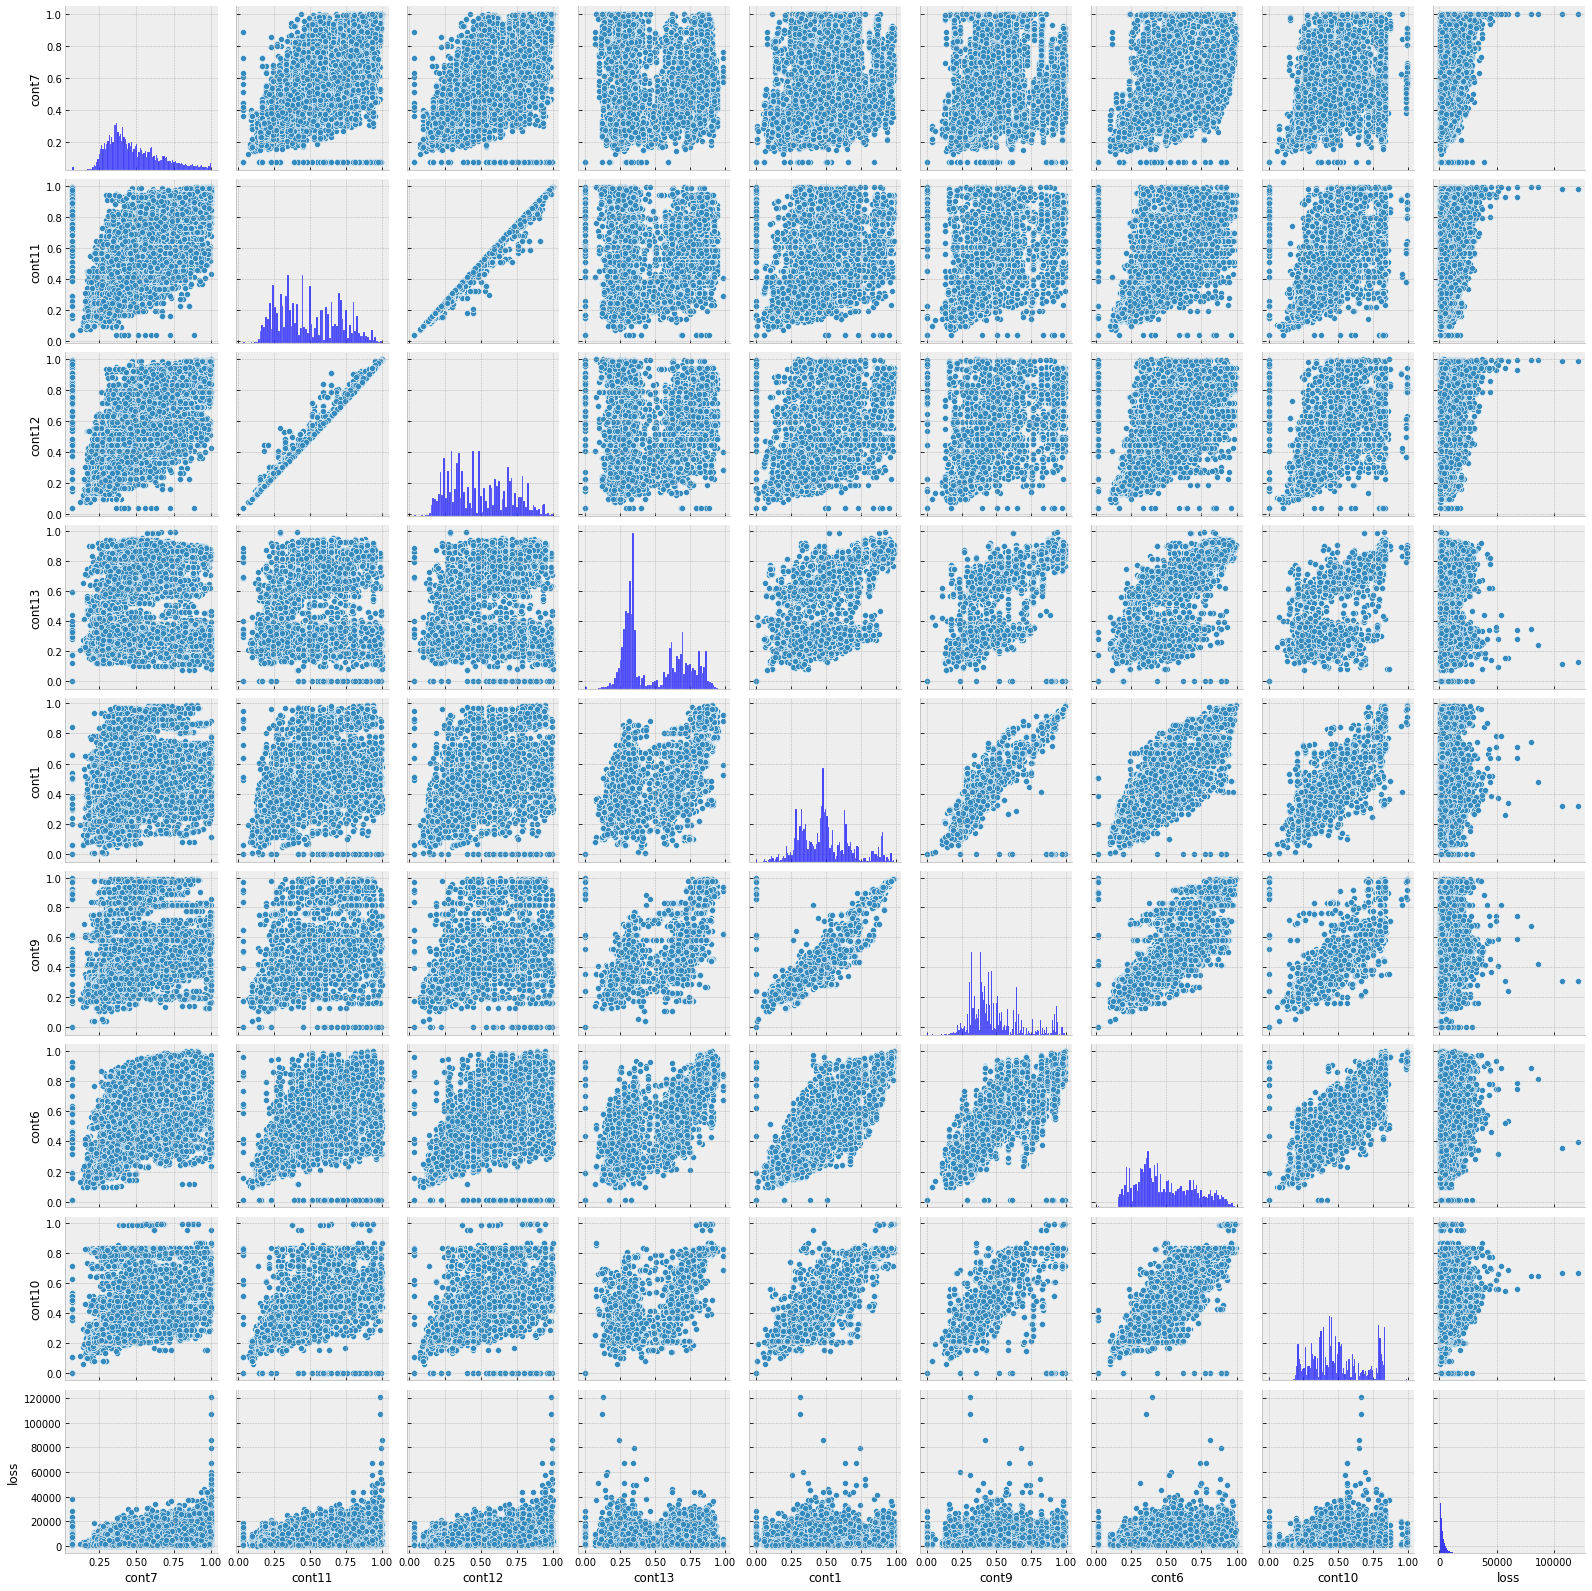

In [29]:
# Pair plot for judging the inter-relations among the continuous variables in 1st cluster
sns.pairplot(train, vars=["cont7", "cont11", "cont12", "cont13", "cont1", "cont9", "cont6", "cont10", "loss"])
plt.show()

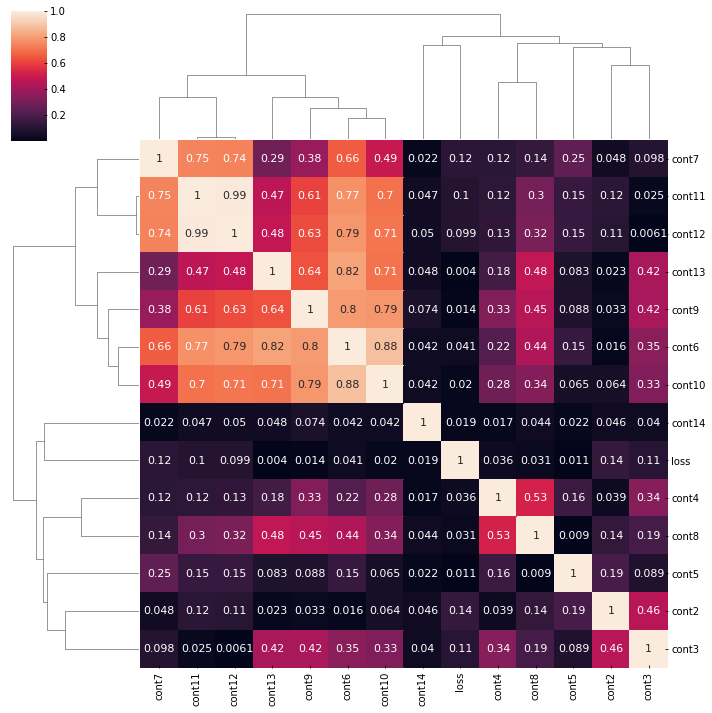

In [30]:
# Clustermap of correlations of continuous variables
import seaborn as sns
cont_data = train.iloc[:,117:132]
cont_data = cont_data.corr().abs()
map = sns.clustermap(cont_data, annot = True, annot_kws = {'size': 11})
plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
plt.show()

Key Insights
Target value "loss" is not highly correlated with any continuous variables
variables cont7, cont11, cont12, cont13, cont9, cont6, cont10 are some what highly correlated
Very weak corelation cluster between cont14, cont4, cont8, cont5, cont2, cont3 

In [31]:
# Correlation between categorical variables
corr_mat_2 = train.iloc[:,1:116].corr()
# Spot the categorical feature pairs with high correlation
threshold = 0.8
high_corrs_2 = (corr_mat_2[abs(corr_mat_2) > threshold][corr_mat_2 != 1.0]) .unstack().dropna().to_dict()
unique_high_corrs_2 = pd.DataFrame(list(set([(tuple(sorted(key)), high_corrs_2[key]) for key in high_corrs_2])), columns=['cat_feature_pair', 'correlation_coefficient'])
unique_high_corrs_2 = unique_high_corrs_2.loc[abs(unique_high_corrs_2['correlation_coefficient']).argsort()[::-1]]
unique_high_corrs_2

cat_feature_pair  correlation_coefficient
0      (cat3, cat90)                 0.955738
7      (cat7, cat89)                 0.955504
10      (cat2, cat9)                 0.932420
12     (cat50, cat6)                 0.925731
9   (cat104, cat116)                 0.918193
5     (cat102, cat8)                 0.900799
2     (cat86, cat98)                 0.886774
8      (cat66, cat8)                 0.862231
3    (cat115, cat86)                 0.850152
1     (cat111, cat4)                 0.829929
4   (cat107, cat115)                 0.829241
11    (cat114, cat6)                 0.827932
6      (cat57, cat7)                 0.809418

High Correlation exists between pairs [cat3, cat90], [cat7, cat89]

Here we are doing Scaling of the data, MinMax and Standard Scaler.
Scaling of the continuous varibales have little effect in our case, as the values are already withn 0 and 1
it is helpful when the feature values have huge scale differences.


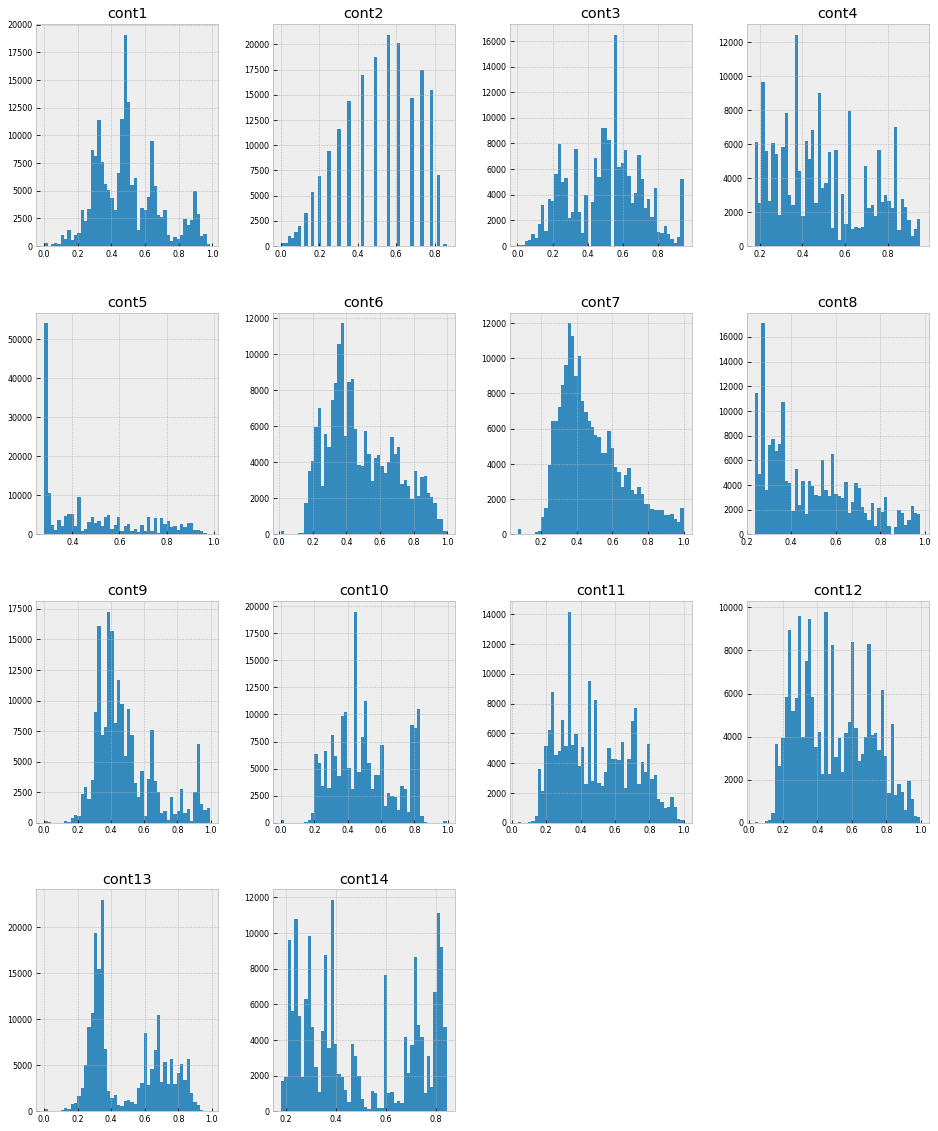

In [32]:
cont_features = train.iloc[:,-15:-1]
cont_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [34]:
# MinMax Scaler
trans = MinMaxScaler()

#cont_features = train.iloc[:,-15:-1]
scaled_data = trans.fit_transform(cont_features)

scaled_data = pd.DataFrame(scaled_data)

scaled_data.describe()

0              1              2              3   \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.501387       0.587390       0.527056       0.405069   
std         0.190506       0.240511       0.214636       0.271802   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.351359       0.414588       0.355058       0.193514   
50%         0.483033       0.643795       0.557931       0.354997   
75%         0.633423       0.790027       0.670750       0.611224   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.293631       0.485802       0.446500       0.335733   
std         0.297534       0.208509       0.191779       0.268216   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.328521       0.301637       0.102136   
50%         0.200881       0.435014       0.396328       0.274687   
75%         0.515525       0.652465       0.560498       0.520234   
max         1.000000       1.000000       1.000000       1.000000   

                  8              9              10             11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487709       0.500579       0.475586       0.474843   
std         0.182514       0.186815       0.217700       0.217642   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.360578       0.366419       0.286105       0.286234   
50%         0.443445       0.463517       0.437900       0.442768   
75%         0.569405       0.617691       0.668039       0.664615   
max         1.000000       1.000000       1.000000       1.000000   

                  12             13  
count  188318.000000  188318.000000  
mean        0.498762       0.475090  
std         0.215304       0.334504  
min         0.000000       0.000000  
25%         0.319276       0.172731  
50%         0.367633       0.342313  
75%         0.697936       0.819245  
max         1.000000       1.000000

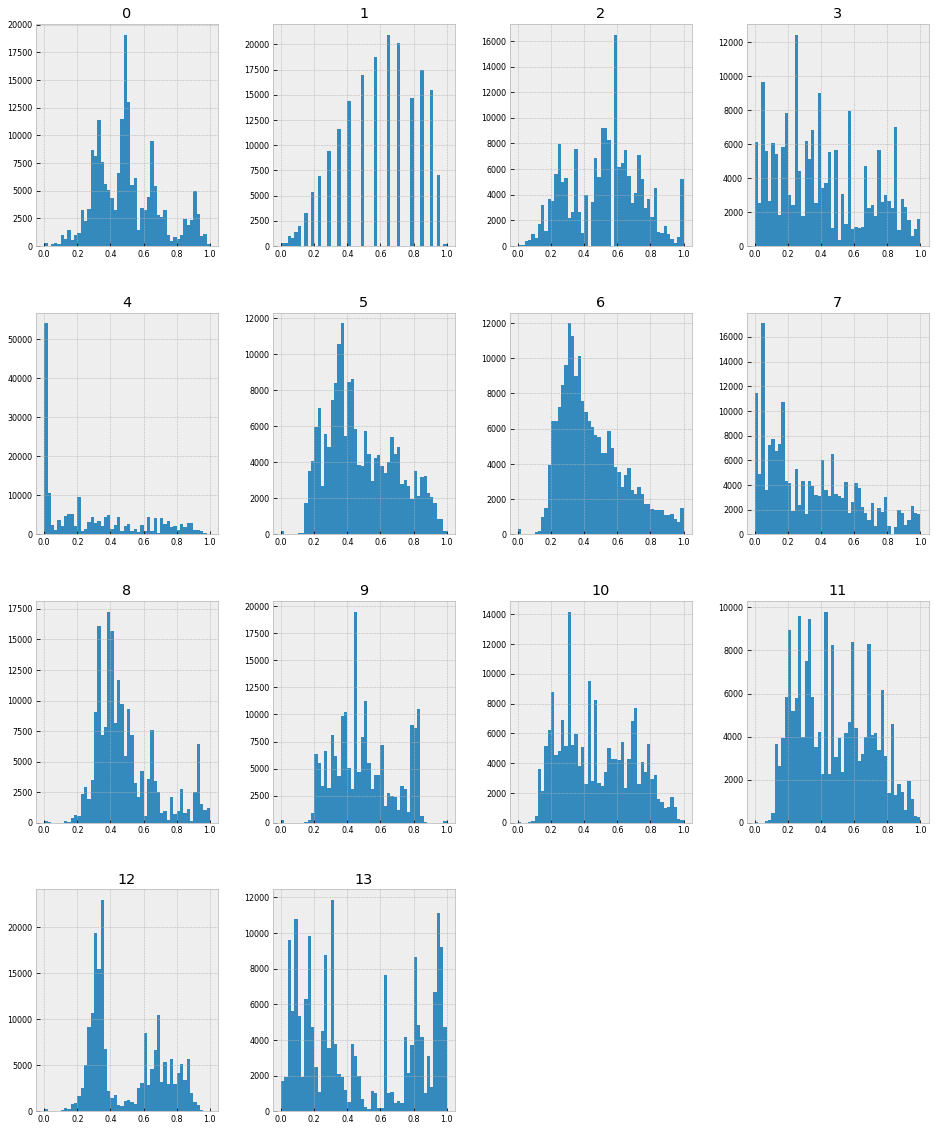

In [35]:
scaled_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [36]:

# Applying Standard Scaler


trans = StandardScaler()

cont_features = train.iloc[:,-15:-1]
scaled_data = trans.fit_transform(cont_features)

scaled_data = pd.DataFrame(scaled_data)

scaled_data.describe()

0             1             2             3             4   \
count  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05   
mean  -5.761524e-16  7.341699e-16 -3.563316e-16 -4.007033e-17 -3.075832e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.631881e+00 -2.442261e+00 -2.455589e+00 -1.490316e+00 -9.868842e-01   
25%   -7.875273e-01 -7.184773e-01 -8.013468e-01 -7.783474e-01 -9.868842e-01   
50%   -9.634084e-02  2.345240e-01  1.438494e-01 -1.842255e-01 -3.117298e-01   
75%    6.930871e-01  8.425272e-01  6.694845e-01  7.584762e-01  7.457784e-01   
max    2.617323e+00  1.715558e+00  2.203481e+00  2.188845e+00  2.374086e+00   

                 5             6             7             8             9   \
count  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05   
mean   2.799641e-17 -2.746817e-17 -2.940000e-16 -2.595893e-16 -4.794856e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.329891e+00 -2.328204e+00 -1.251730e+00 -2.672174e+00 -2.679556e+00   
25%   -7.543139e-01 -7.553681e-01 -8.709303e-01 -6.965570e-01 -7.181437e-01   
50%   -2.435770e-01 -2.616155e-01 -2.276036e-01 -2.425212e-01 -1.983893e-01   
75%    7.993124e-01  5.944241e-01  6.878805e-01  4.476154e-01  6.268911e-01   
max    2.466081e+00  2.886134e+00  2.476616e+00  2.806862e+00  2.673360e+00   

                 10            11            12            13  
count  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05  
mean  -1.829199e-16 -8.753593e-17 -6.615000e-16 -3.664435e-16  
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  
min   -2.184604e+00 -2.181765e+00 -2.316558e+00 -1.420286e+00  
25%   -8.703801e-01 -8.666038e-01 -8.336422e-01 -9.039048e-01  
50%   -1.731129e-01 -1.473762e-01 -6.090452e-01 -3.969402e-01  
75%    8.840306e-01  8.719477e-01  9.250844e-01  1.028851e+00  
max    2.408891e+00  2.412945e+00  2.328058e+00  1.569220e+00

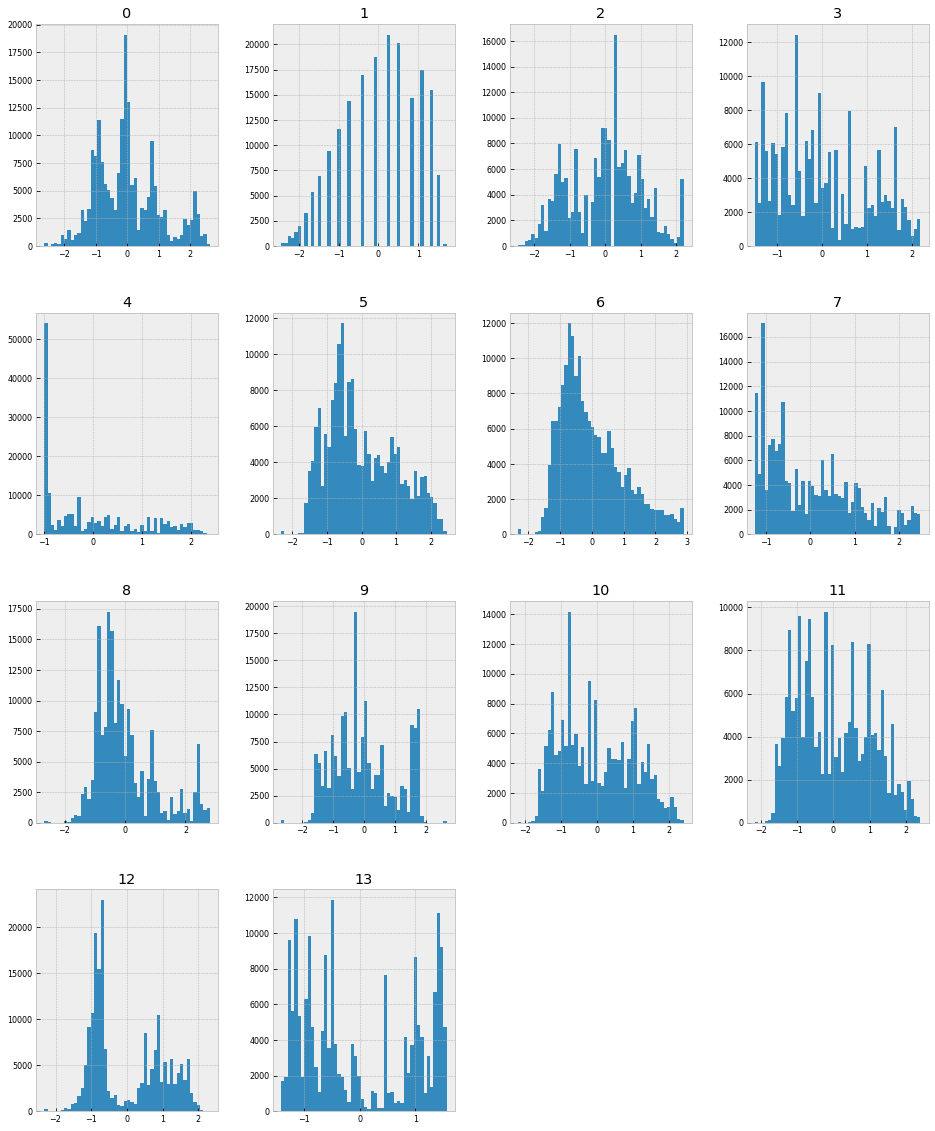

In [37]:
scaled_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

<AxesSubplot:xlabel='loss', ylabel='Density'>

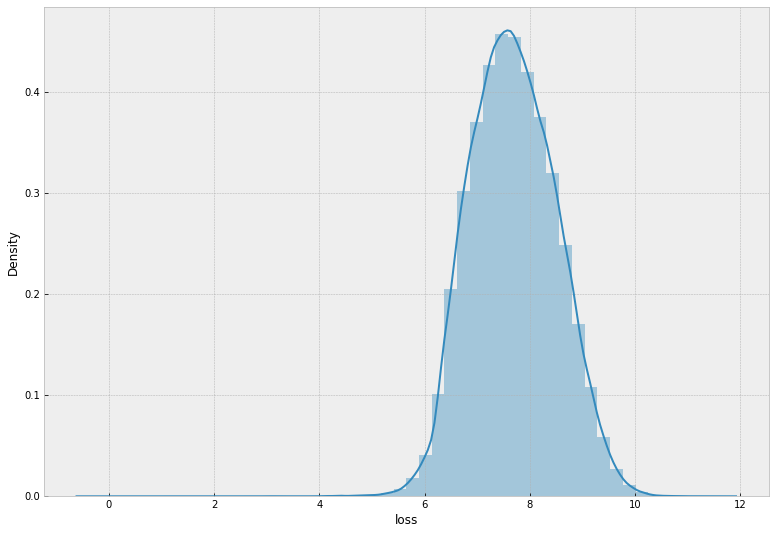

In [38]:
plt.figure(figsize=(13,9))
sns.distplot(np.log(train["loss"]))

In [39]:
cont_features.describe()

cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.336105       0.350175       0.312800   
50%         0.422268       0.440945       0.438285       0.441060   
75%         0.643315       0.655021       0.591045       0.623580   
max         0.983674       0.997162       1.000000       0.980200   

               cont9         cont10         cont11         cont12  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.485506       0.498066       0.493511       0.493150   
std         0.181660       0.185877       0.209737       0.209427   
min         0.000080       0.000000       0.035321       0.036232   
25%         0.358970       0.364580       0.310961       0.311661   
50%         0.441450       0.461190       0.457203       0.462286   
75%         0.566820       0.614590       0.678924       0.675759   
max         0.995400       0.994980       0.998742       0.998484   

              cont13         cont14  
count  188318.000000  188318.000000  
mean        0.493138       0.495717  
std         0.212777       0.222488  
min         0.000228       0.179722  
25%         0.315758       0.294610  
50%         0.363547       0.407403  
75%         0.689974       0.724623  
max         0.988494       0.844848

<AxesSubplot:>

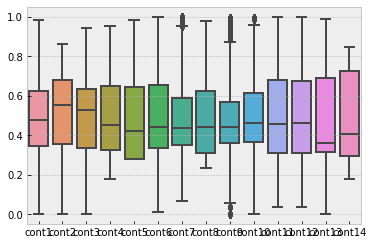

In [40]:
sns.boxplot(data=cont_features)

<AxesSubplot:>

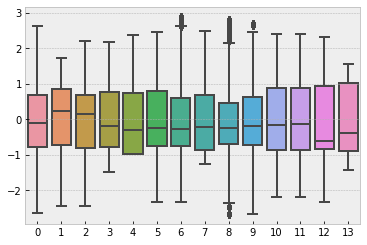

In [41]:
sns.boxplot(data=scaled_data)

In [42]:
# Seems log of loss is Normally distributed, let's check the Skewness of loss and log of loss
loss = train['loss']
loss.skew()

3.7949583775378604

In [43]:
# As we can see skewness of Loss is 3, highly Right skewed  
# Where as skewness of log of loss is 0.09 , more closer to 0 
# So we shall use log of loss in our model 
log_loss = np.log(train['loss'])
log_loss.skew()

0.09297454555136214

Imporant features

In [46]:
df_num_corr = train.corr()['loss'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.11].sort_values(ascending=False)
print("There is {} strongly correlated values with Loss:\n{}".format(len(golden_features_list), golden_features_list))



There is 32 strongly correlated values with Loss:
cat79     0.441172
cat101    0.352646
cat87     0.346311
cat57     0.316736
cat12     0.311080
cat10     0.282162
cat7      0.280216
cat89     0.267107
cat2      0.229665
cat72     0.228227
cat11     0.225347
cat13     0.221970
cat9      0.221870
cat3      0.193180
cat16     0.191076
cat90     0.189789
cat23     0.160264
cat36     0.156529
cat103    0.153883
cat111    0.150267
cont2     0.141528
cat40     0.125181
cat28     0.123004
cont7     0.119799
cat105    0.115273
cont3     0.111053
cat50    -0.110300
cat6     -0.116883
cat73    -0.154457
cat1     -0.222105
cat81    -0.259191
cat80    -0.473257
Name: loss, dtype: float64


In [47]:
# considering only top 33 important features
train_imp = ['cat80', 'cat79', 'cat87', 'cat57', 'cat101', 'cat12', 'cat10', 'cat7', 'cat89', 'cat2', 'cat72', 'cat11', 'cat13', 'cat9', 'cat3', 'cat16', 'cat90', 'cat23', 
                    'cat36', 'cat103', 'cat111', 'cont2', 'cat40', 'cat28', 'cont7', 'cat105', 'cont3', 'cat50', 'cat6', 'cat73', 'cat1', 'cat81']



Train and Test Split, just Important paramters

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 12345

#X = train.drop(["id","loss"],axis=1)
X = train[train_imp]
#Y = train["loss"]
Y = log_loss


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [49]:
# Creating the Linear regression model  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS
from sklearn.metrics import r2_score, mean_squared_error


model_lin = LinearRegression(n_jobs=-1)
mae_val= make_scorer(mean_absolute_error, greater_is_better=False)
results1 = cross_val_score(model_lin, x_train, y_train, cv=5, scoring=mae_val, n_jobs=-1)
print("Linear Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(-1*results1.mean(), results1.std()))


Linear Regression (Manual Tuning): (0.480) +/- (0.002)


In [50]:
model_lin.fit(x_train,y_train)
y_prediction =  model_lin.predict(x_test)

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score',score)
print('mean_sqrd_error',mean_squared_error(y_test,y_prediction))
print('root_mean_squared',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 score 0.44017319082219675
mean_sqrd_error 0.3664141277229724
root_mean_squared 0.6053215077320253


In [51]:
# Lasso with CV

from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import numpy as np


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_reg = LassoCV(eps=1e-3, n_alphas=200, cv=30, random_state=seed, max_iter=2000)

lasso_reg.fit(x_train, y_train)

y_prediction = lasso_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(lasso_reg.score(x_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(lasso_reg.score(x_test, y_test)))

# summarize chosen configuration
print('alpha: %f' % lasso_reg.alpha_)
#print('l1_ratio_: %f' % model.l1_ratio_)

print('Lasso Coefficient Indexes %s' % np.nonzero(lasso_reg.coef_))
print('Lasso Coefficients %s' % lasso_reg.coef_[np.nonzero(lasso_reg.coef_)])


r2 score is  0.440167877221569
mean_sqrd_error 0.36641760554559033
root_mean_squared 0.6053243804321699
(poly deg 2 + ridge) R-squared score (training): 0.438
(poly deg 2 + ridge) R-squared score (test): 0.440
alpha: 0.000385
Lasso Coefficient Indexes [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Lasso Coefficients [-0.16233984  0.0879728   0.04147726  0.05958964  0.07308018  0.09477601
  0.03004707  0.0093141   0.06798656  0.05375982  0.01014552  0.00828846
  0.00466692  0.03793255 -0.01623198 -0.0133257  -0.02742077 -0.02550286
  0.19457064  0.16651378  0.06672923 -0.04668726 -0.02900494  0.09282881
  0.01740568  0.0200824  -0.02131787  0.06869233 -0.04885775 -0.08396384
 -0.07725312]


In [55]:
# Ridge with CV

from sklearn.linear_model import RidgeCV

alphas_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 20, 30, 40, 50, 60, 70, 100.0]
ridge_reg = RidgeCV( alphas=alphas_list, cv=10 )

ridge_reg.fit(x_train, y_train)

y_prediction = ridge_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(ridge_reg.score(x_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(ridge_reg.score(x_test, y_test)))

print('alpha: %f' % ridge_reg.alpha_)

print( 'Ridge Coefficients %s' % ridge_reg.coef_ )



r2 score is  0.4401785904780606
mean_sqrd_error 0.36641059357605243
root_mean_squared 0.6053185884937389
(poly deg 2 + ridge) R-squared score (training): 0.438
(poly deg 2 + ridge) R-squared score (test): 0.440
alpha: 100.000000
Ridge Coefficients [-0.16223371  0.08809013  0.04194336  0.05961474  0.06111406  0.09825986
  0.03350164  0.01653963 -0.00721314  0.06808392  0.05395145  0.01337579
  0.01148071  0.00961719  0.04649776 -0.01797434 -0.02078599 -0.02863803
 -0.02659478  0.19611311  0.16814851  0.06685404 -0.04739098 -0.02974755
  0.09303602  0.01758013  0.02036131 -0.0261171   0.07388627 -0.04917827
 -0.08403667 -0.07743002]


In [56]:
# Lars with CV 
from sklearn.linear_model import LarsCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lars_reg = LarsCV(eps=1e-3, max_n_alphas=100, cv=10, max_iter=1000)

lars_reg.fit(x_train, y_train)

y_prediction = lars_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(lars_reg.score(x_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(lars_reg.score(x_test, y_test)))

# summarize chosen configuration
print('alpha: %f' % lars_reg.alpha_)
#print('l1_ratio_: %f' % model.l1_ratio_)

print('Lars Coefficients %s' % lars_reg.coef_)


r2 score is  0.44017319082219675
mean_sqrd_error 0.3664141277229724
root_mean_squared 0.6053215077320253
(poly deg 2 + ridge) R-squared score (training): 0.438
(poly deg 2 + ridge) R-squared score (test): 0.440
alpha: 0.000000
Lars Coefficients [-0.16234826  0.08808501  0.041934    0.05969077  0.0617457   0.09814834
  0.03331804  0.01661113 -0.00737146  0.06853391  0.05394759  0.01320994
  0.01131224  0.00917292  0.04704335 -0.01806461 -0.02127046 -0.02881487
 -0.02676275  0.1964788   0.16849209  0.06690017 -0.0475405  -0.02986877
  0.09311046  0.01755347  0.02037041 -0.02652314  0.07441656 -0.04920903
 -0.08405383 -0.07739945]


In [57]:
# ElasticNet Cross Validatiom, with Hyper Paramter tuning and Alphas count 

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
import numpy as np

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# L1 range, Tuning HyperParameter r, l1-ratio 
ratios = [.1, .5, .7, .9, .95, .99, 1]

elastic_reg = ElasticNetCV(l1_ratio=ratios, eps=1e-3, n_alphas=200, cv=30, random_state=seed, max_iter=2000)

elastic_reg.fit(x_train, y_train)

y_prediction = elastic_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(elastic_reg.score(x_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(elastic_reg.score(x_test, y_test)))

# summarize chosen configuration
print('alpha: %f' % elastic_reg.alpha_)
print('l1_ratio_: %f' % elastic_reg.l1_ratio_)

print('Elastic Net Coefficient Indexes %s' % np.nonzero(elastic_reg.coef_))
print('Elastic Net Coefficients %s' % elastic_reg.coef_[np.nonzero(elastic_reg.coef_)])

r2 score is  0.440167877221569
mean_sqrd_error 0.36641760554559033
root_mean_squared 0.6053243804321699
(poly deg 2 + ridge) R-squared score (training): 0.438
(poly deg 2 + ridge) R-squared score (test): 0.440
alpha: 0.000385
l1_ratio_: 1.000000
Elastic Net Coefficient Indexes [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Elastic Net Coefficients [-0.16233984  0.0879728   0.04147726  0.05958964  0.07308018  0.09477601
  0.03004707  0.0093141   0.06798656  0.05375982  0.01014552  0.00828846
  0.00466692  0.03793255 -0.01623198 -0.0133257  -0.02742077 -0.02550286
  0.19457064  0.16651378  0.06672923 -0.04668726 -0.02900494  0.09282881
  0.01740568  0.0200824  -0.02131787  0.06869233 -0.04885775 -0.08396384
 -0.07725312]


In [177]:
# Elastic Net with CV with list of ratios and alphas 

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
import numpy as np
from numpy import arange



cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# L1 range, Tuning HyperParameter r, l1-ratio 
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]


elastic_reg = ElasticNetCV(l1_ratio=ratios, eps=1e-3, alphas=alphas, cv=30, random_state=seed, max_iter=5000)

elastic_reg.fit(x_train, y_train)

y_prediction = elastic_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(elastic_reg.score(x_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(elastic_reg.score(x_test, y_test)))

# summarize chosen configuration
print('alpha: %f' % elastic_reg.alpha_)
print('l1_ratio_: %f' % elastic_reg.l1_ratio_)

print('Elastic Net Coefficient Indexes %s' % np.nonzero(elastic_reg.coef_))
print('Elastic Net Coefficients %s' % elastic_reg.coef_[np.nonzero(elastic_reg.coef_)])


r2 score is  0.4401810671146451
mean_sqrd_error 0.3664089725843119
root_mean_squared 0.6053172495347476
(poly deg 2 + ridge) R-squared score (training): 0.438
(poly deg 2 + ridge) R-squared score (test): 0.440
alpha: 0.001000
l1_ratio_: 0.000000
Elastic Net Coefficient Indexes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Elastic Net Coefficients [-0.16217564  0.08809271  0.04194809  0.05957622  0.0608254   0.09830719
  0.03358595  0.01650424 -0.00713393  0.06786038  0.05395335  0.0134522
  0.01155848  0.00982822  0.04622764 -0.01792904 -0.02054641 -0.0285488
 -0.02651     0.19592842  0.16797505  0.0668309  -0.04731544 -0.02968631
  0.09299832  0.01759361  0.02035683 -0.02591447  0.0736209  -0.04916274
 -0.0840279  -0.07744544]


In [58]:
# SGDRegressor l1 and l2, Elastic net with Cross Validation 

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RepeatedKFold
import numpy as np
from numpy import arange


# L1 range, Tuning HyperParameter r, l1-ratio 
#ratios = arange(0, 1, 0.01)
#alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]


sgd_reg = SGDRegressor(penalty='elasticnet', l1_ratio=0.1, random_state=seed, max_iter=2000,
                          early_stopping=True, validation_fraction=0.2, learning_rate='adaptive')

sgd_reg.fit(x_train, y_train)

y_prediction = sgd_reg.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

print('Elastic Net Coefficient Indexes %s' % np.nonzero(sgd_reg.coef_))
print('Elastic Net Coefficients %s' % sgd_reg.coef_[np.nonzero(sgd_reg.coef_)])


r2 score is  0.4401093295721856
mean_sqrd_error 0.36645592576449965
root_mean_squared 0.6053560322359889
Elastic Net Coefficient Indexes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Elastic Net Coefficients [-0.16345205  0.08834273  0.04143404  0.06053661  0.06746381  0.09526594
  0.03171517  0.01434058 -0.00611663  0.0695747   0.05333777  0.01294217
  0.01085808  0.00642862  0.04670304 -0.01679972 -0.02284902 -0.02818995
 -0.02762268  0.19655869  0.17019598  0.06746641 -0.04744431 -0.03007719
  0.09234129  0.01753087  0.02042164 -0.02584056  0.07341518 -0.04836004
 -0.08532119 -0.07755034]


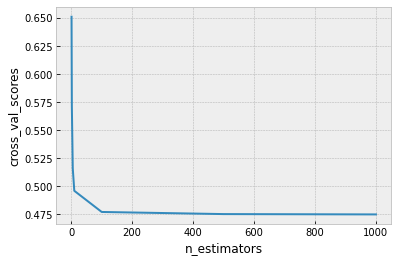

In [60]:
# let's check Random forest performance with different no of trees (estimators)
h = [1, 2, 5, 10, 100, 500, 1000]
scores = []

for val in h:
    model = RandomForestRegressor(n_jobs=-1,n_estimators=val, max_features=12, random_state=seed)
    mae_val = make_scorer(mean_absolute_error, greater_is_better=False)
    results = cross_val_score(model, x_train, y_train, cv=2, scoring=mae_val, n_jobs=1)
    scores.append(-1*results.mean())

import pandas as pd
df = pd.DataFrame(list(zip(h, scores)), columns=['n_estimators','cross_val_scores'])
ax = sns.lineplot(x="n_estimators", y="cross_val_scores", data=df)


Appears as the estimators are decreasing as the cross val score is increasing, and beyond 100 there is no visible change in scores.
Let us try the model performance with a few estimators and compare.

In [187]:
# Random Forest 1
from sklearn.ensemble import RandomForestRegressor

model_1_md = RandomForestRegressor(n_jobs=-1,n_estimators=1, max_features=12, max_depth=20, 
                                   random_state=seed, min_samples_leaf=6)
model_1_md.fit(x_train, y_train)
y_prediction = model_1_md.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.35592962644894266
mean_sqrd_error 0.42155266637465766
root_mean_squared 0.6492708728833119


In [61]:
# Random Forest 50
from sklearn.ensemble import RandomForestRegressor

model_50_md = RandomForestRegressor(n_jobs=-1,n_estimators=50, max_features=12, max_depth=20, 
                                    random_state=seed, min_samples_leaf=6)
model_50_md.fit(x_train, y_train)
y_prediction = model_50_md.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.4768368599278938
mean_sqrd_error 0.3424172663468303
root_mean_squared 0.5851643071367479


In [189]:
# Random Forest 100
from sklearn.ensemble import RandomForestRegressor

model_100_md = RandomForestRegressor(n_jobs=-1,n_estimators=100, max_features=12, max_depth=20, 
                                     random_state=seed, min_samples_leaf=6)
model_100_md.fit(x_train, y_train)
y_prediction = model_100_md.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))



r2 score is  0.47807874524781213
mean_sqrd_error 0.34160443580929645
root_mean_squared 0.5844693625925113


In [182]:

from xgboost import XGBRegressor
model_xgb_50 = XGBRegressor(n_estimators=50)
model_xgb_50.fit(x_train,y_train)

y_prediction = model_xgb_50.predict(x_test)
print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.48487030360179095
mean_sqrd_error 0.33715927010919783
root_mean_squared 0.5806541742803524


In [183]:
from xgboost import XGBRegressor
model_xgb_80 = XGBRegressor(n_estimators=80)
model_xgb_80.fit(x_train,y_train)

y_prediction = model_xgb_80.predict(x_test)
print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.4850623299535841
mean_sqrd_error 0.3370335862958495
root_mean_squared 0.5805459381443036


In [184]:
from xgboost import XGBRegressor
model_xgb_100 = XGBRegressor(n_estimators=100)
model_xgb_100.fit(x_train,y_train)

y_prediction = model_xgb_100.predict(x_test)
print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.484862901434017
mean_sqrd_error 0.3371641149269231
root_mean_squared 0.580658346126983


From the Lin, Ridge, Lasso, SGD and Elasticnet models we find ElasticNet gives highest r2 and lowest rmse.
Then I tried XGBRegressor and RandomForest regressors, and they gave better performance.
Let us submit these models.

In [62]:

test_data = pd.read_csv('all-st-test.csv', error_bad_lines=False, warn_bad_lines=False)

test_data=test_data.drop('id',axis=1)
#test_data = test_data[ train_imp ]

# Convert categorical features to continuous features with Label Encoding in test data
from sklearn.preprocessing import LabelEncoder
lencoders_2 = {}
for col in test_data.select_dtypes(include=['object']).columns:
    lencoders_2[col] = LabelEncoder()
    test_data[col] = lencoders_2[col].fit_transform(test_data[col])
    
test_data.head()


cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...     cont5  \
0     1     2     1     1     1     1     1     1     2      1  ...  0.281143   
1     1     2     1     2     1     1     1     1     2      1  ...  0.836443   
2     1     2     1     2     2     1     2     1     2      2  ...  0.718531   
3     1     1     1     1     2     1     1     1     1      1  ...  0.397069   
4     2     1     1     1     1     2     1     1     1      1  ...  0.302678   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.466591  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858   
1  0.482425  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759   
2  0.212308  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676   
3  0.369930  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872   
4  0.398862  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251   

     cont13    cont14  
0  0.704052  0.392562  
1  0.453468  0.208045  
2  0.258586  0.297232  
3  0.592264  0.555955  
4  0.301535  0.825823  

[5 rows x 130 columns]

In [63]:
# Test data has one row with NaN values, dropping that row 
df = pd.DataFrame(test_data)
df1 = df[df.isna().any(axis=1)]
df1
test_data = test_data.dropna()
print("Number of missing values",test_data.isnull().sum().sum())

Number of missing values 0


In [65]:
# sc = Standard Scaler 
#test_scaled_all = sc_all.transform(test_data)

test_scaled = sc.transform( test_data[train_imp] )
test_scaled

array([[ 0.59812894, -0.34186497, -0.31920522, ..., -0.46884114,
         1.742057  ,  0.44897565],
       [ 0.59812894, -0.34186497, -0.31920522, ..., -0.46884114,
         1.742057  ,  0.44897565],
       [-1.68520209, -0.34186497, -0.31920522, ..., -0.46884114,
         1.742057  , -2.38470585],
       ...,
       [ 0.59812894, -0.34186497, -0.31920522, ..., -0.46884114,
         4.05814802,  0.44897565],
       [ 0.59812894, -0.34186497, -0.31920522, ..., -0.46884114,
         1.742057  ,  0.44897565],
       [-1.68520209,  2.36442084,  3.52380782, ..., -0.46884114,
         1.742057  ,  0.44897565]])

In [216]:
import numpy as np

yp = model_100_md.predict(test_scaled)

submission = pd.read_csv('sample_submission.csv')
submission['loss'] = yp
submission.head()



id      loss
0   4  7.544029
1   6  7.583010
2   9  9.150671
3  12  8.756823
4  15  7.443378

In [194]:
submission.to_csv('AllstateClaimsPred_3.csv', index=False)
print("Submission successful")

Submission successful


In [198]:
submission.to_csv('AllstateClaimsPred_5.csv', index=False)
print("Submission successful")

Submission successful


In [217]:

yp = sgd_reg.predict(test_scaled)
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = yp
print( submission.head() )
submission.to_csv('AllstateClaimsPred_6.csv', index=False)
print("Submission successful")



   id       loss
0   4   8.112381
1   6   8.552962
2   9  10.471788
3  12   9.309808
4  15   7.755757
Submission successful


Let us try Polynomial features , Lasso, Ridge, ElasticNet next

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.20, random_state=seed)

ratios = arange(0, 1, 0.1)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]


elastic_reg_poly = ElasticNetCV(n_jobs=-1, l1_ratio=ratios, eps=1e-3, alphas=alphas, cv=10, random_state=seed, max_iter=2000)

elastic_reg_poly.fit(x_train, y_train)

y_prediction = elastic_reg_poly.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 score is  0.48186179659808714
mean_sqrd_error 0.3391283781466096
root_mean_squared 0.582347300282752


In [69]:
# Polynmoial features with Ridge Reg with CV 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.20, random_state=seed)

alphas_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 20, 30, 40, 50, 60, 70, 100.0]
ridge_reg_poly = RidgeCV( alphas=alphas_list, cv=10 )

ridge_reg_poly.fit(x_train, y_train)

y_prediction = ridge_reg_poly.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.48171056346109564
mean_sqrd_error 0.33922736225573963
root_mean_squared 0.5824322812617272


In [72]:
# Polynmoial features with Lasso Reg with CV 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.20, random_state=seed)

lasso_reg_poly = LassoCV(eps=1e-3, n_alphas=200, cv=10, random_state=seed, max_iter=2000)

lasso_reg_poly.fit(x_train, y_train)

y_prediction = lasso_reg_poly.predict(x_test)

print("r2 score is ", r2_score(y_test,y_prediction))
print('mean_sqrd_error', mean_squared_error(y_test,y_prediction))
print('root_mean_squared', np.sqrt(mean_squared_error(y_test,y_prediction)))



r2 score is  0.4520826814589267
mean_sqrd_error 0.3586192069515087
root_mean_squared 0.598848233654829


In [68]:

test_poly = poly.fit_transform(test_scaled)
yp = elastic_reg_poly.predict(test_poly)
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = yp
print( submission.head() )
submission.to_csv('AllstateClaimsPred_7.csv', index=False)
print("Submission successful")



   id       loss
0   4   8.935373
1   6  10.359457
2   9  41.018454
3  12   2.656554
4  15   9.780312
Submission successful


In [70]:
# Using Ridge Reg CV with Polynomials Model 

test_poly = poly.fit_transform(test_scaled)
yp = ridge_reg_poly.predict(test_poly)
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = yp
print( submission.head() )
submission.to_csv('AllstateClaimsPred_8.csv', index=False)
print("Submission successful")

   id       loss
0   4  11.835008
1   6  12.887520
2   9  53.213456
3  12   1.871111
4  15   5.179892
Submission successful


In [73]:
# Using Lasso CV with Polynomials Model 

test_poly = poly.fit_transform(test_scaled)
yp = lasso_reg_poly.predict(test_poly)
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = yp
print( submission.head() )
submission.to_csv('AllstateClaimsPred_9.csv', index=False)
print("Submission successful")

   id      loss
0   4  7.721078
1   6  7.765325
2   9  6.890310
3  12  7.582218
4  15  7.715823
Submission successful
